In [23]:
import pandas as pd #DataFrames y otras cositas
import seaborn as sns #GRAFICAS
import matplotlib.pyplot as plt #GRAFICAS
import numpy as np #Arrays y Random Funcion
from sklearn.datasets import fetch_california_housing #SET DE DATOS DE PRUEBA
from sklearn.model_selection import train_test_split #FUNCION PARA ENTRENAR LA MAQUINA
from sklearn.linear_model import LinearRegression #Metodo de Regresion Lineal
from sklearn import metrics #Analisar la efectividad de la regresion.
pd.set_option("display.width",None) #acomodar los DF a las dimensiones del pc
sns.axes_style("whitegrid") #Establecer un tema bonito a las graficas


{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [24]:
california = fetch_california_housing() #Convertir CALIFORNIA en un objeto para llamarlo facil mente con metodos.

In [25]:
print(california.DESCR) #hacer la descripcion que ofrece Sklearn sobre sus Sets de prueba

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [26]:
california.feature_names #Nombres de las variables, muy parecido a nombrar sus columnas, pero no esta el target

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [27]:
california.data.shape #Datos para trabajar 

(20640, 8)

In [28]:
california.target.shape #Variable dependiente, esta sera la variable que va en funcion de las variables independientes.

(20640,)

In [29]:
california_df = pd.DataFrame(california.data, columns= california.feature_names)
california_df['Price'] = pd.Series(california.target)
california_df['Price'] *= 100

In [30]:
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452.6
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358.5
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352.1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341.3
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342.2
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78.1
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77.1
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92.3
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84.7


In [31]:
muestra = california_df.sample(frac=0.1, random_state=17) 
# Funcion sample se usa para agarrar tan solo una muestra random de el set de datos anterior, muy util para sets muy grandes

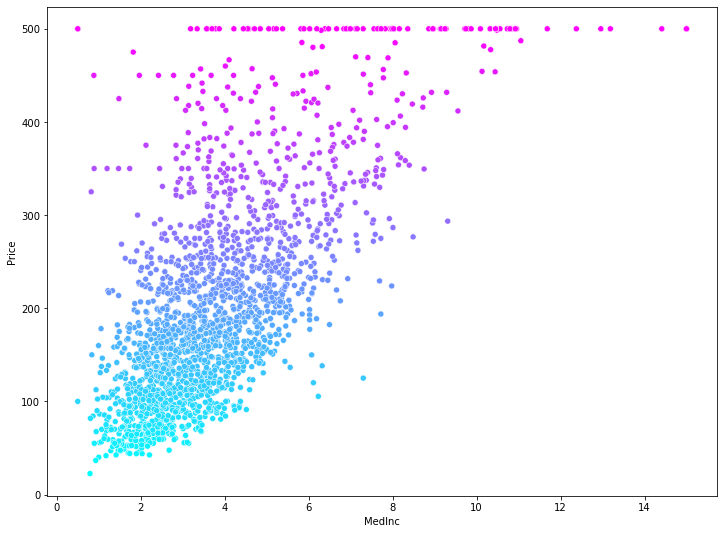

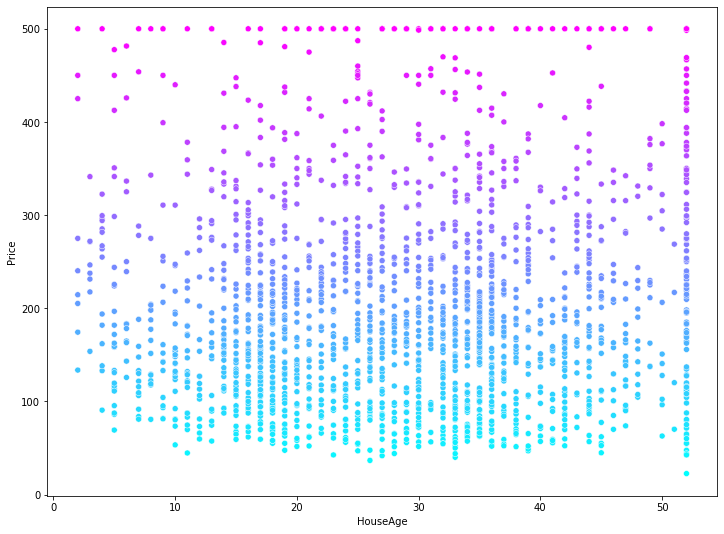

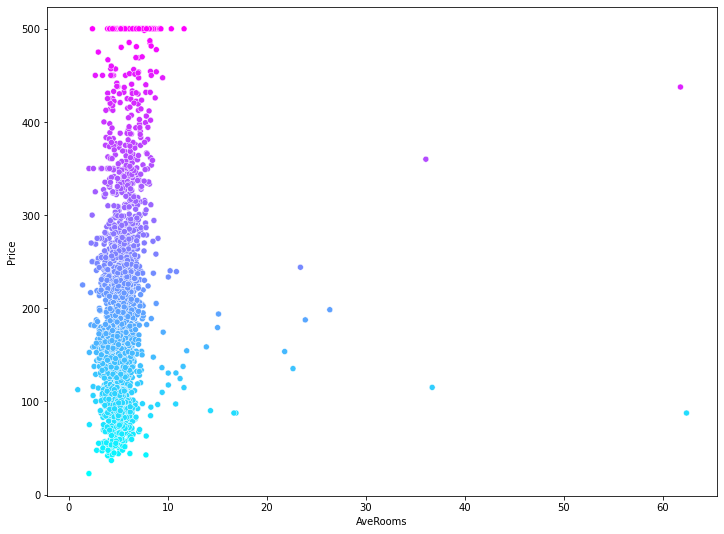

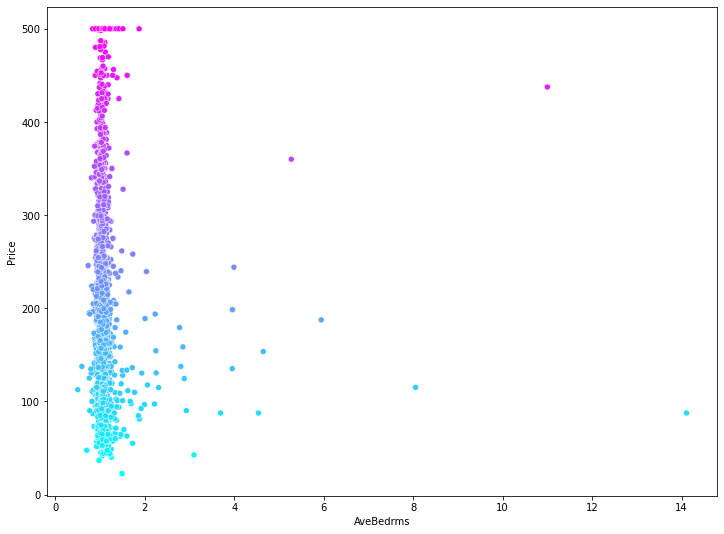

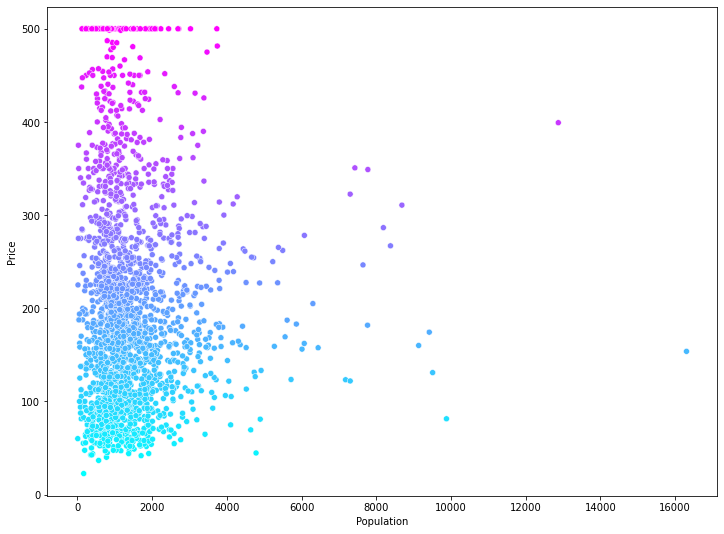

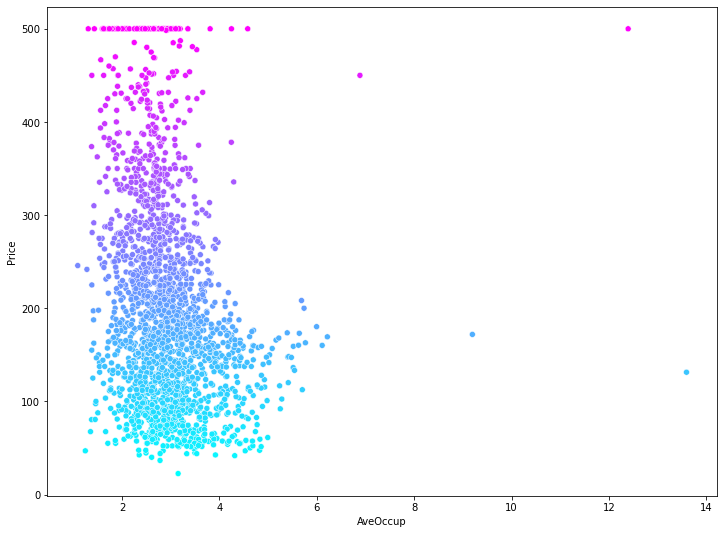

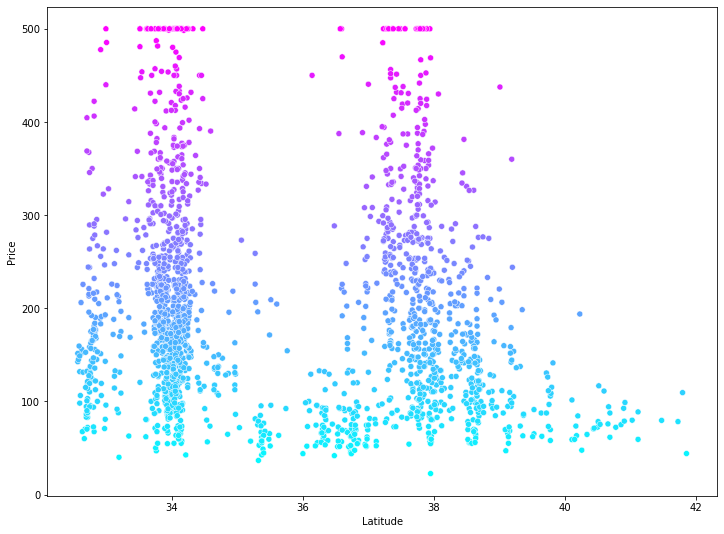

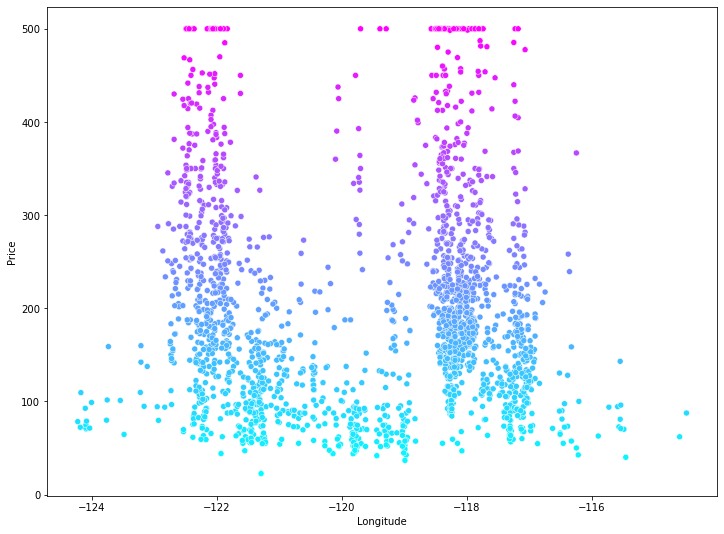

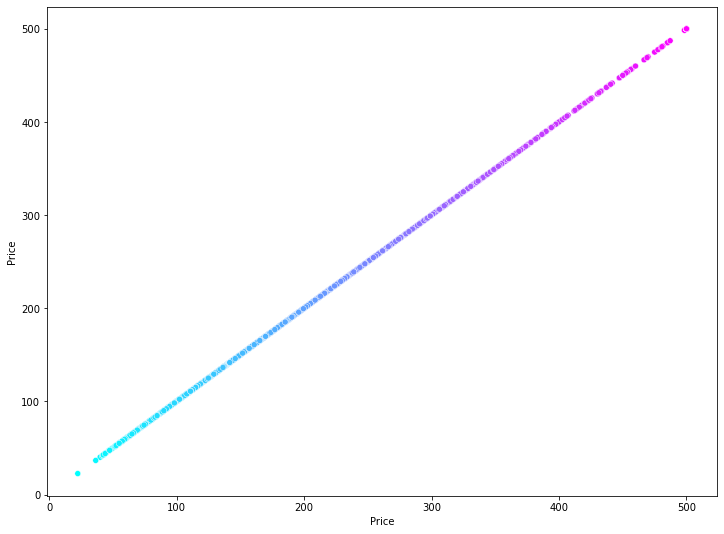

In [32]:
for columna in california_df.columns:  #Recorrer las columnas para graficar cada una
    fig = plt.figure(figsize=(12,9))
    axes = sns.scatterplot(x=columna, y = 'Price', data=muestra, hue="Price", palette='cool', legend=False )
    #hue se usa para estanblecer en funcion de que variable depende el color y palette para un tema bonito wUw
    

In [33]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11) 
#los x,y(Train) son las variables con las que se va a entrenar la maquina, las variables (Test) son las variables de prueba
# random_state es una semilla random


In [34]:
x_train.shape

(15480, 8)

In [35]:
x_test.shape

(5160, 8)

In [36]:
reglin = LinearRegression() #convertir la regresion lineal en un metodo

In [37]:
reglin.fit(X = x_train, y = y_train) #metodo Fit se usa para entrenar la maquina, se entrenan con las variables llamadas train

LinearRegression()

In [38]:
for i, name in enumerate(california.feature_names): #enumera cada columna, y con ello se usa el bucle for para probar el modelo
    print(f'{name}: {reglin.coef_[i]}')


MedInc: 0.4377030215382207
HouseAge: 0.009216834565797805
AveRooms: -0.10732526637360953
AveBedrms: 0.6117133073918067
Population: -5.75682200931564e-06
AveOccup: -0.003384566465716353
Latitude: -0.41948186096490636
Longitude: -0.4337713349874019


In [39]:
reglin.intercept_ #donde corta el eje x o y

-36.88295065605551

In [40]:
prediccion = reglin.predict(x_test) #aqui empiezan las predicciones con las variables de train que establecimos antes
valorEsperado = y_test


In [41]:
Df = pd.DataFrame()
Df['Valor de Prediccion'] = pd.Series(prediccion)
Df['Valor Esperado'] = pd.Series(valorEsperado)
Df

,Valor de Prediccion,Valor Esperado
0,1.253969,0.762
1,2.346931,1.732
2,2.037947,1.125
3,1.870125,1.370
4,2.536083,1.856
...,...,...
5155,1.746200,0.906
5156,2.630372,2.782
5157,1.413765,0.700
5158,1.266169,0.866


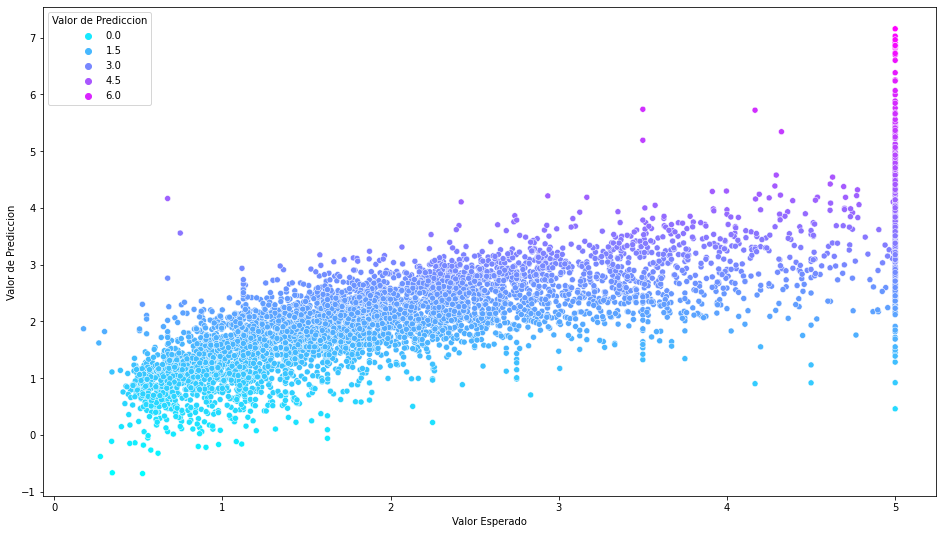

In [42]:
fig = plt.figure(figsize=(16,9))
axes = sns.scatterplot(data= Df, x="Valor Esperado", y = "Valor de Prediccion", hue="Valor de Prediccion", palette='cool')

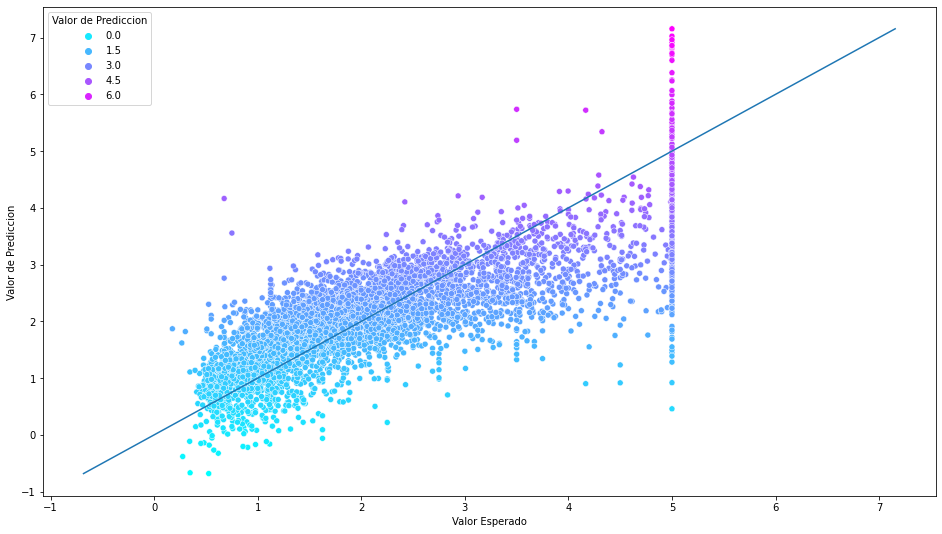

In [43]:
fig = plt.figure(figsize=(16,9))
axes = sns.scatterplot(data= Df, x="Valor Esperado", y = "Valor de Prediccion", hue="Valor de Prediccion", palette='cool')
start = min(valorEsperado.min(), prediccion.min())
end = max(valorEsperado.max(), prediccion.max())
line = plt.plot([start, end], [start, end]) 

In [44]:
metrics.r2_score(valorEsperado, prediccion)

0.600898311596433

In [45]:
metrics.mean_squared_error(valorEsperado, prediccion)

0.5350149774449121